In [16]:
import pandas as pd
import seaborn as sns
df = pd.read_excel('Downloads/Telco-Customer-Churn.xlsx')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 1. Compare churn count with respect to gender

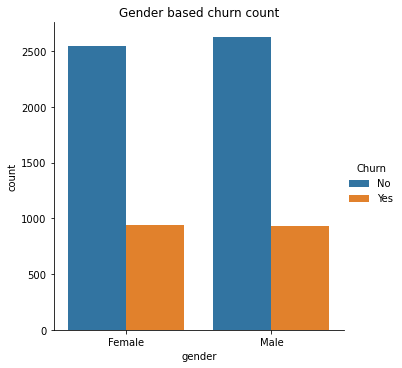

In [18]:
sns.catplot(x='gender', hue='Churn', kind='count', data=df).set(title='Gender based churn count')

# 2. Find out how many female senior citizens there in the dataset

Category_seniorcitizen
Female Senior citizen     568
Male Senior citizen       574
Other females            2920
Other males              2981
dtype: int64


<AxesSubplot:title={'center':'Age & Gender based count'}>

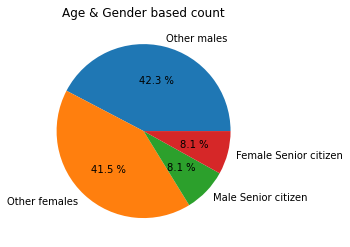

In [19]:
import numpy as np
df1=df.copy()
conditions=[(df1['SeniorCitizen']==0) & (df1['gender']=='Male'),
           (df1['SeniorCitizen']==0) & (df1['gender']=='Female'),
           (df1['SeniorCitizen']==1) & (df1['gender']=='Male'),
           (df1['SeniorCitizen']==1) & (df1['gender']=='Female')]
values=['Other males','Other females','Male Senior citizen','Female Senior citizen']
df1['Category_seniorcitizen']=np.select(conditions, values) ## creates a new category based on gender and senior citizenship

print(df1.groupby('Category_seniorcitizen').size()) ## gives the count per category
df1['Category_seniorcitizen'].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title='Age & Gender based count')

# 3. Compare 'tenure' with 'Total Charges'

[Text(0.5, 1.0, 'Total charges vs Tenure scatter plot')]

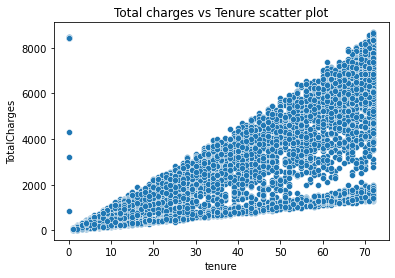

In [20]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="tenure",y="TotalCharges").set(title='Total charges vs Tenure scatter plot')

# 4. Find out which contract is preferred by the senior citizen.

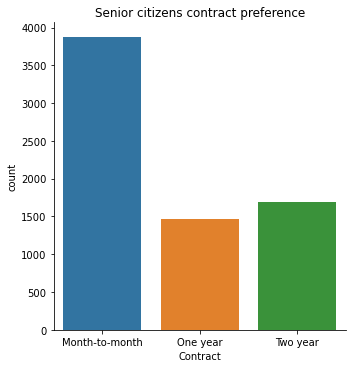

In [21]:
sen_cit=df.copy()
sen_cit.loc[sen_cit['SeniorCitizen']==0] ## filters out senior citizens
sns.catplot(x='Contract', kind="count", data=sen_cit).set(title='Senior citizens contract preference')


# 5. Findings on Payment Method

<AxesSubplot:title={'center':'Popularity of various payment methods'}>

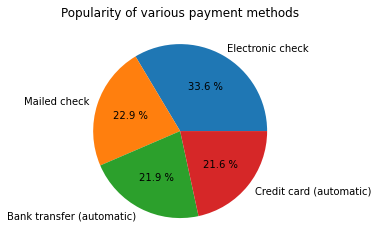

In [22]:
df1['PaymentMethod'].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title='Popularity of various payment methods')

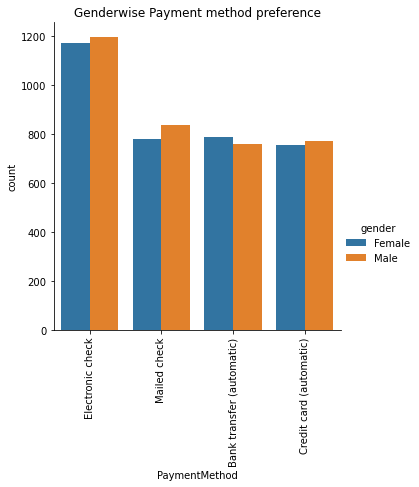

In [24]:
sns.catplot(x='PaymentMethod', hue='gender', kind='count', 
            data=df).set(title='Genderwise Payment method preference').set_xticklabels(rotation=90) 


[Text(0, 0, 'Electronic check'),
 Text(1, 0, 'Mailed check'),
 Text(2, 0, 'Bank transfer (automatic)'),
 Text(3, 0, 'Credit card (automatic)')]

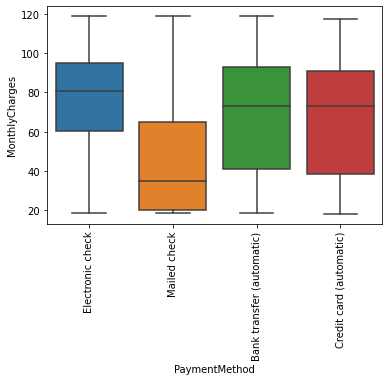

In [25]:
ax=sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)